In [82]:
import pandas as pd

In [83]:
cpu = pd.read_csv('cpuUtilization.csv')

In [84]:
cpu.head(5)

,timestamp,value
0,2014-02-14 14:30:00,0.132
1,2014-02-14 14:35:00,0.134
2,2014-02-14 14:40:00,0.134
3,2014-02-14 14:45:00,0.134
4,2014-02-14 14:50:00,0.134


In [85]:
cpu['timestamp'].describe()

count                    4032
unique                   4032
top       2014-02-15 00:05:00
freq                        1
Name: timestamp, dtype: object

In [86]:
df = pd.to_datetime(cpu['timestamp'])
cpu['date'] = df.dt.date
cpu['minute'] = df.dt.minute

In [87]:
cpu.head()

,timestamp,value,date,minute
0,2014-02-14 14:30:00,0.132,2014-02-14,30
1,2014-02-14 14:35:00,0.134,2014-02-14,35
2,2014-02-14 14:40:00,0.134,2014-02-14,40
3,2014-02-14 14:45:00,0.134,2014-02-14,45
4,2014-02-14 14:50:00,0.134,2014-02-14,50


In [88]:
cpu['date'].max()

datetime.date(2014, 2, 28)

In [89]:
cpu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 4 columns):
timestamp    4032 non-null object
value        4032 non-null float64
date         4032 non-null object
minute       4032 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 126.1+ KB


In [90]:
df = cpu['value']

In [107]:
df.describe()

count    4032.000000
mean        0.126303
std         0.094813
min         0.066000
25%         0.132000
50%         0.134000
75%         0.134000
max         2.344000
Name: value, dtype: float64

In [109]:
list(cpu.columns.values)

['timestamp', 'value', 'date', 'minute']

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline

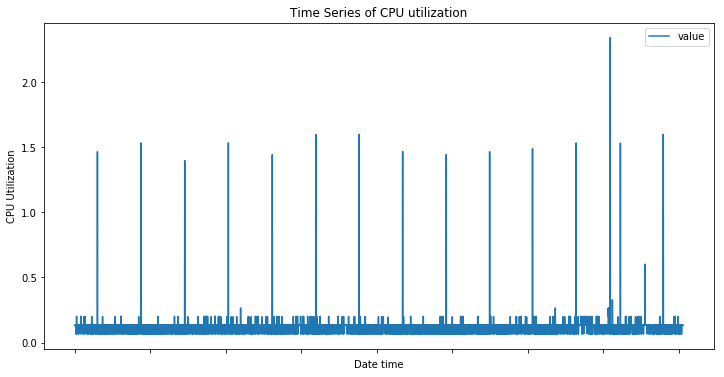

In [104]:
cpu.plot(x='timestamp', y='value', figsize=(12,6))
plt.xlabel('Date time')
plt.ylabel('CPU Utilization')
plt.title('Time Series of CPU utilization');

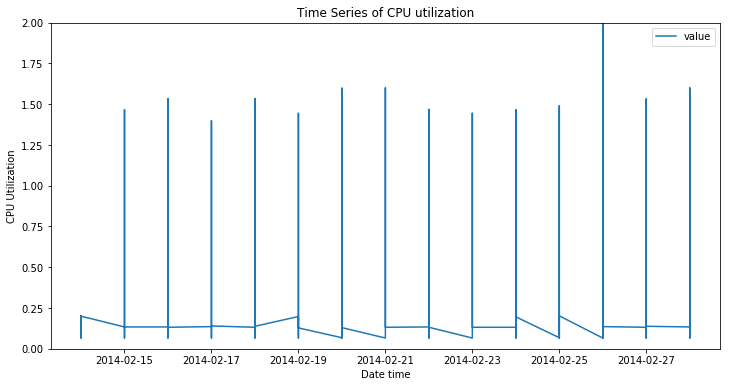

In [110]:
cpu.plot(x='date', y='value', figsize=(12,6))
plt.ylim(0.0, 2)
plt.xlabel('Date time')
plt.ylabel('CPU Utilization')
plt.title('Time Series of CPU utilization');

## k means clustering

In [140]:
import numpy as np
from sklearn.cluster import KMeans

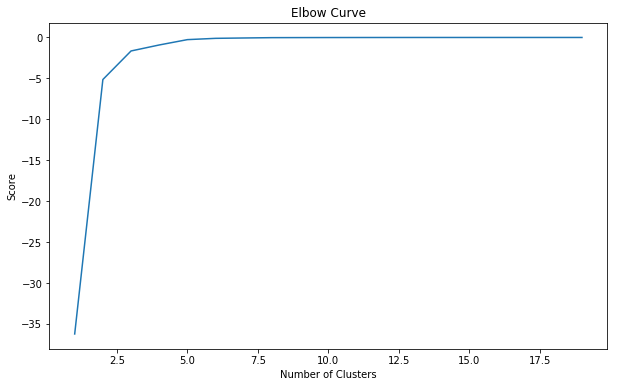

In [145]:
data = cpu[['value']]
#array.reshape(-1, 1)
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();